<a href="https://colab.research.google.com/github/Anne340/KNN_and_Naive_Bayes_Classifier/blob/main/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

## Specifying the question
We are trying to predict if the email is a spam or not


## Defining the metric for success
We are using the naive bayes classifier model to find out if an email is a spam or not

## Understanding the context
The last column (column 1) contains details showing if the message is a spam(1) or not(0)

## Recording the experimental design
Import the necessary libraries

Load the dataset

Read the dataset

Clean the dataset

Perform univariate and bivariate analysis

Perfrom naive bayes classifier

## Data relevance

The dataset is relevant for performing the prediction

The dataset has 4600 rows and 58 columns

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
data = pd.read_csv('spambase.data', sep=",")
data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [3]:
data['1'].nunique

<bound method IndexOpsMixin.nunique of 0       1
1       1
2       1
3       1
4       1
       ..
4595    0
4596    0
4597    0
4598    0
4599    0
Name: 1, Length: 4600, dtype: int64>

# Checking the data

In [4]:
# Reading the dataset
data.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [5]:
# Checking the shape of the dataset
data.shape

(4600, 58)

In [6]:
# Checking the statistical analysis of the data
data.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [7]:
# Checking the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

In [8]:
# Checking the unique values of each column in the dataset
data.nunique()

0          142
0.64       171
0.64.1     214
0.1         43
0.32       255
0.2        141
0.3        173
0.4        170
0.5        144
0.6        245
0.7        113
0.64.2     316
0.8        158
0.9        133
0.10       118
0.32.1     253
0.11       197
1.29       229
1.93       575
0.12       148
0.96       401
0.13        99
0.14       164
0.15       143
0.16       395
0.17       281
0.18       240
0.19       200
0.20       156
0.21       179
0.22       128
0.23       106
0.24       184
0.25       110
0.26       177
0.27       159
0.28       188
0.29        53
0.30       163
0.31       125
0.32.2     108
0.33       186
0.34       136
0.35       160
0.36       230
0.37       227
0.38        38
0.39       106
0.40       313
0.41       641
0.42       225
0.778      963
0.43       504
0.44       316
3.756     2160
61         271
278        919
1            2
dtype: int64

# Cleaning the dataset

In [9]:
# Checking for null values
data.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

The dataset does not have any null values

In [10]:
# Checking for duplicates
data.duplicated().sum()

391

In [11]:
# Checking percent of duplicates in the dataset
data.duplicated(keep=False).mean()* 100

12.41304347826087

Since the duplicated values are 12% of the data we can easily drop them

In [12]:
# Drop duplicates in the dataset
data.drop_duplicates(inplace=True)

In [13]:
# Checking if duplicates were dropped
data.duplicated().sum()

0

# Univariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


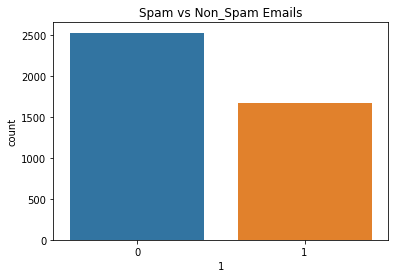

In [14]:
sns.countplot(data['1'])
plt.title('Spam vs Non_Spam Emails')
plt.show()

# Bivariate analysis

## 80:20 partition

In [15]:
corr_matrix = data.corr().abs()
corr_matrix

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,0.004392,0.103818,0.040799,...,0.027262,0.019680,0.034798,0.059236,0.101934,0.009158,0.044779,0.059132,0.084126,0.129321
0.64,0.034114,1.000000,0.027609,0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,...,0.014782,0.028209,0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
0.64.1,0.063267,0.027609,1.000000,0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,...,0.036754,0.024462,0.035780,0.097231,0.073000,0.004503,0.095684,0.092511,0.051967,0.172193
0.1,0.005384,0.008936,0.019895,1.000000,0.000256,0.009167,0.014286,0.003798,0.001044,0.003849,...,0.000030,0.011450,0.007516,0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
0.32,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,...,0.035049,0.054583,0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,0.010498,0.230117
0.2,0.055040,0.005623,0.066608,0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,...,0.021758,0.011628,0.016743,0.058173,0.105903,0.020405,0.013559,0.065714,0.063402,0.212455
0.3,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,...,0.034092,0.061357,0.029478,0.051036,0.067215,0.049300,0.039171,0.050828,0.017082,0.334605
0.4,0.004392,0.013781,0.007263,0.003798,0.023410,0.079683,0.033675,1.000000,0.106872,0.079023,...,0.028986,0.042785,0.021393,0.029069,0.053550,0.008128,0.009974,0.035606,0.036894,0.200780
0.5,0.103818,0.053525,0.077618,0.001044,0.014482,0.097012,0.049216,0.106872,1.000000,0.123341,...,0.015016,0.037420,0.017308,0.035985,0.152436,0.002084,0.110786,0.166304,0.233199,0.221591
0.6,0.040799,0.184441,0.025201,0.003849,0.027232,0.010068,0.055670,0.079023,0.123341,1.000000,...,0.006757,0.005008,0.003785,0.031657,0.077378,0.034473,0.073125,0.101552,0.078587,0.131822


In [16]:
# Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
data.drop(data[to_drop], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


The dataset has a normal distribution

In [17]:
# Training and splitting our data
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Feature scaling using normalization
from sklearn.preprocessing import StandardScaler
 
sc = StandardScaler(with_std = False, with_mean = False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 
model

GaussianNB()

In [20]:
y_pred = model.predict(X_test)

In [21]:
# evaluating the algorithm
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[350 145]
 [ 11 336]]


In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8147268408551069


## 70:30 Partition

In [23]:
# Training and splitting our data
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 
model

GaussianNB()

In [26]:
y_pred = model.predict(X_test)

In [27]:
# Evaluating the algorithm
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[534 203]
 [ 20 506]]


In [28]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.8234362628661916


## 60:40 Prediction

In [29]:
# Training and splitting our data
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 
model

GaussianNB()

In [32]:
y_pred = model.predict(X_test)

In [33]:
# Evaluating the algorithm
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[729 265]
 [ 27 663]]


In [34]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.8266033254156769


# Optimization of the model

In [35]:
#splitting data into target and features
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#import Linear Discriminant Analysismethod from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.naive_bayes import GaussianNB
# Introduce the Gaussian object and fit the train set
gnb = GaussianNB()

model = gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluating our model using accuracy score
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.8960807600950119


After optimizing our model, our accuracy score improves to 89%